In [1]:
import sympy as sym
sym.init_printing()

In [2]:
import imp
macaulay = imp.load_source('macaulay', '../src/macaulay.py')

In [3]:
x, y, z = sym.symbols('x, y, z')

# The $U$- resultant.

**Simple Numerical Example from:** http://isc.tamu.edu/resources/preprints/1996/1996-02.pdf.

The $u$ resultant introduces a new variable and polynomial to the system. Thus now we have $n + 1$
polynomials over $n + 1$ variables.

Consider the following example:

$$f_1 = y - 3x + 5$$
$$ f_2 = x ^ 2 + y ^ 2 - 5$$

These is now written as:

$$ f_1 = y - 3x +  5 z$$
$$ f_2 = x ^ 2 + y ^ 2 - 5z ^2$$
$$ U = u_1x + u_2y + u_3z$$

We then calculate the resultant using the Macaulay formulation.

In [4]:
a_1, a_2, b_1, b_2, c_1, c_2 = sym.symbols('a_1, a_2, b_1, b_2, c_1, c_2')

In [5]:
u_1, u_2, u_3 = sym.symbols('u_1, u_2, u_3')

In [6]:
p = sym.lambdify((x, y, z), a_1 * x + b_1 * y + c_1 * z)
q = sym.lambdify((x, y, z), a_2 * x ** 2 + b_2 * y ** 2 + c_2 * z ** 2)
h = sym.lambdify((x, y, z), u_1 * x + u_2 * y + u_3 * z)

In [7]:
mac = macaulay.MacaulayResultant(polynomials=[p, q, h], variables=[x, y, z])

In [8]:
mac.get_monomials_set()

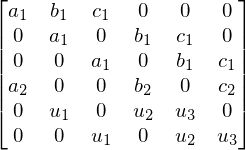

In [9]:
matrix = mac.get_matrix()
matrix

In [12]:
mac.degrees

In [13]:
matrix.shape

In [14]:
submatrix = mac.get_submatrix(matrix)
submatrix

In [15]:
determinant = sym.lambdify((a_1, a_2, b_1, b_2, c_1, c_2), (matrix.det() / submatrix.det()).factor())

In [16]:
sol = determinant(-3, 1, 1, 1, 5, -5).factor()

In [17]:
sol

The solutions are given by the coefficients of $u$. More specifically:
$$ x = \frac{\text{coeff. of } u_1}{\text{coeff. of } u_3}, y = \frac{\text{coeff. of } u_1}{\text{coeff. of } u_3} $$

# The GCP Approach

The Generalized Characteristic Polynomial (GCP) is a second way of retrieving the values of the roots.
The GCP takes the form of:
    
$$R = \frac{det|A -sI|}{det|M -sI|}$$
evaluated at $s=0$ after division.

In [18]:
s = sym.symbols('s')

In [19]:
As = matrix - sym.eye(6) * s

In [20]:
Ms = submatrix - sym.eye(submatrix.shape[0]) * s

In [21]:
determinant = sym.lambdify((a_1, a_2, b_1, b_2, c_1, c_2), (As.det() / Ms.det()).factor())

In [22]:
determinant(-3, 1, 1, 1, 5, -5).subs({s:0}).factor()

# Numerical examples

A very simple numerical example used for proof of concept.

Initally using the Macaulay formulation we confirm that common roots exist.

In [23]:
a_3, b_3, c_3 = sym.symbols('a_3, b_3, c_3')

In [24]:
f = sym.lambdify((x, y, z), a_1 * x + b_1 * y + c_1 * z)
g = sym.lambdify((x, y, z), a_2 * x ** 2 + b_2 * y ** 2 + c_2 * z)
h = sym.lambdify((x, y, z), a_3 * x  + b_3 * y - c_3 * z)

In [25]:
mac = macaulay.MacaulayResultant(polynomials=[f, g, h], variables=[x, y, z])

In [26]:
mac.get_monomials_set()

In [27]:
mac.degrees

In [28]:
matrix = mac.get_matrix()

In [29]:
matrix.det().subs({a_1: 1, a_2: -1, a_3: 1,
                   b_1: 1, b_2: 1, b_3: 1,
                   c_1: 1, c_2: 1, c_3: 1})

In [30]:
submatrix = mac.get_submatrix(matrix)

Secondly, we need to indentify the roots. The system is the following:

$$f_1 = x + y + z$$
$$f_2 = -x ^ 2 + y ^ 2 + z$$
$$f_3 = x + y - z$$ 

We know that the common root of the system is $(1, -1, 0)$.

**The $U$- resultant.**

In [ ]:
d_3, d_1, d_2 = sym.symbols('d_3, d_1, d_2')
k, u_0, u_1, u_2, u_3 = sym.symbols('k, u_0, u_1, u_2, u_3') 

In [ ]:
f = sym.lambdify((x, y, z, k), a_1 * x + b_1 * y + c_1 * z + d_1 * k)
g = sym.lambdify((x, y, z, k), a_2 * x ** 2 + b_2 * y ** 2 + c_2 * z * k )
h = sym.lambdify((x, y, z, k), a_3 * x * k + b_3 * y * k - c_3 * z ** 2)
l = sym.lambdify((x, y, z, k), u_0 * x + u_1 * y + u_2 * z  + u_3 * k)

In [ ]:
mac = macaulay.MacaulayResultant(polynomials=[f, g, h, l], variables=[x, y, z, k])

In [ ]:
mac.get_monomials_set()

In [ ]:
matrix = mac.get_matrix()
submatrix = mac.get_submatrix(matrix)

In [ ]:
matrix.shape

In [ ]:
matrix

In [ ]:
submatrix.shape

In [ ]:
det_A = matrix.det()

In [ ]:
det_M = submatrix.det()

In [ ]:
(det_A / det_M).simplify()

**The GCP.**

In [ ]:
matrix.shape, submatrix.shape

In [ ]:
As = matrix - sym.eye(20) * s

In [ ]:
Ms = submatrix - sym.eye(submatrix.shape[0]) * s

In [ ]:
determinant = sym.lambdify((a_1, a_2, a_3, b_1, b_2, b_3, c_1, c_2, c_3), (As.det() / Ms.det()).factor())

In [ ]:
determinant(1, -1, 1, 1, 1, 1, 1, 1, 1).subs({s: 0})